# Q9.1
***Apply Principal Component Analysis and then create a regression model using the first few principal components. Specify your new model in terms of the original variables (not the principal components), and compare its quality to that of your solution to Question 8.2. ***

In this exercise I am going to build a linear regression model like the last homework, but in this scenario I am 
first going to implement principle component analysis. PCA is a useful tool in building models because it can help us to evaluate how much variance each predictor explains in a dataset and can help us adjust a dataset to account for high correlations between those predictors. A high correlation between predictors within a dataset is an important aspect of modeling to account for because it can help you prevent over fitting a model (which is what we saw in the previous hw). In the first code block below, I start by loading the data and getting a quick view of the structure of the data.

In [26]:
# Basic project set up
rm(list = ls())
setwd("/Users/wwaite/Dev/gtech/ISYE 6501/Week 6")
set.seed(1)

# Load libraries
suppressWarnings(library(dplyr))
suppressWarnings(library(tidyr))
suppressWarnings(library(GGally))

In [27]:
# Read in the data
uscrime <- tbl_df(read.table("uscrime.txt", stringsAsFactors = FALSE, header = TRUE))

# Get a view of the data
str(uscrime)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: int  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : int  791 1635

After getting a high level view of the data and confirming that it is the same dataset as the previous HW, I then took a look at a correlation plot using a subset of the data. Last week I found that there were high correlations between Po1 and Po2, as well as Wealth and Inequality. I chose to show a subset of the predictors becaues the plot would be very large with all of the predictors, and this is just to show that some variables are very highly correlated.

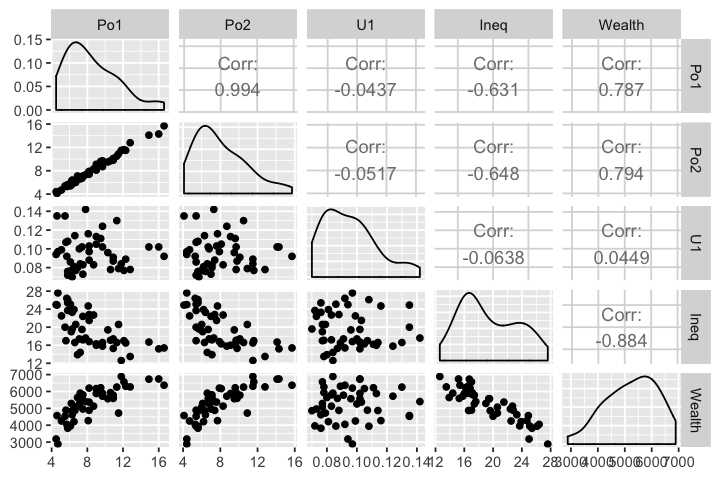

In [90]:
options(repr.plot.height = 4, repr.plot.width = 6)
# One way to demonstrate correlations is to Visualize a subsest of 
# the matrix of the data to demonstrate that there are correlations between variables
ggpairs(uscrime, columns = c("Po1", "Po2", "U1", "Ineq", "Wealth"))


After visualizing the data I next moved on to implementing PCA using the prcomp function. I executed the principle component analysis function with the predictor variables only (removing the response variable Crime) and I also scaled the data. You can see from the summary output that PC1 explains about 40% of the variance of the data, suggesting that this predictor will be highly correlated with other components of the data. The remaining variables are listed in decreasing order of importance by the proportion of variance that they explain. Another method that is sometimes employed is the Kaiser method which states that predictors with an eigenvalue standard deviation or at least 1 are significant. You can see from the standard deviation output that the first 4 components are above 1 suggesting that they are important predictors, and the fifth componnent is borderline so I will include it in the model.


In [29]:
# Run PCA on the matrix of Scaled predictors
PCA <- prcomp(uscrime[,1:15], scale = TRUE)
summary(PCA)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.4534 1.6739 1.4160 1.07806 0.97893 0.74377 0.56729
Proportion of Variance 0.4013 0.1868 0.1337 0.07748 0.06389 0.03688 0.02145
Cumulative Proportion  0.4013 0.5880 0.7217 0.79920 0.86308 0.89996 0.92142
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.55444 0.48493 0.44708 0.41915 0.35804 0.26333 0.2418
Proportion of Variance 0.02049 0.01568 0.01333 0.01171 0.00855 0.00462 0.0039
Cumulative Proportion  0.94191 0.95759 0.97091 0.98263 0.99117 0.99579 0.9997
                          PC15
Standard deviation     0.06793
Proportion of Variance 0.00031
Cumulative Proportion  1.00000

In [48]:
# pca$rotation is the matrix of eigenvectors
head(PCA$rotation)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
M,-0.3037119,0.06280357,0.17241999,-0.02035537,-0.35832737,-0.449132706,-0.15707378,-0.55367691,0.1547479,-0.01443093,0.3944666,0.16580189,-0.05142365,0.04901705,0.005139801
So,-0.3308813,-0.15837219,0.01554331,0.29247181,-0.12061130,-0.100500743,0.19649727,0.22734157,-0.6559987,0.06141452,0.2339787,-0.05753357,-0.29368483,-0.29364512,0.008436923
Ed,0.3396215,0.21461152,0.06773962,0.07974375,-0.02442839,-0.008571367,-0.23943629,-0.14644678,-0.4432698,0.51887452,-0.1182195,0.47786536,0.19441949,0.03964277,-0.028005204
Po1,0.3086341,-0.26981761,0.05064582,0.33325059,-0.23527680,-0.095776709,0.08011735,0.04613156,0.1942547,-0.14320978,-0.1304200,0.22611207,-0.18592255,-0.09490151,-0.689415513
Po2,0.3109929,-0.26396300,0.05306512,0.35192809,-0.20473383,-0.119524780,0.09518288,0.03168720,0.1951207,-0.05929780,-0.1388591,0.19088461,-0.13454940,-0.08259642,0.720027010
LF,0.1761776,0.31943042,0.27153018,-0.14326529,-0.39407588,0.504234275,-0.15931612,0.25513777,0.1439350,0.03077073,0.3853283,0.02705134,-0.27742957,-0.15385625,0.033682319


We can use the screeplot function to plot the variances of each of the principle components (where variance = pca$sdev^2) to help us decide on a number of principle components to use. The decision of how many components to use is subjective and from the plot below you could choose either 4 or 5 which is where the graph starts to level out and I am choosing 5 based on the output I found above.

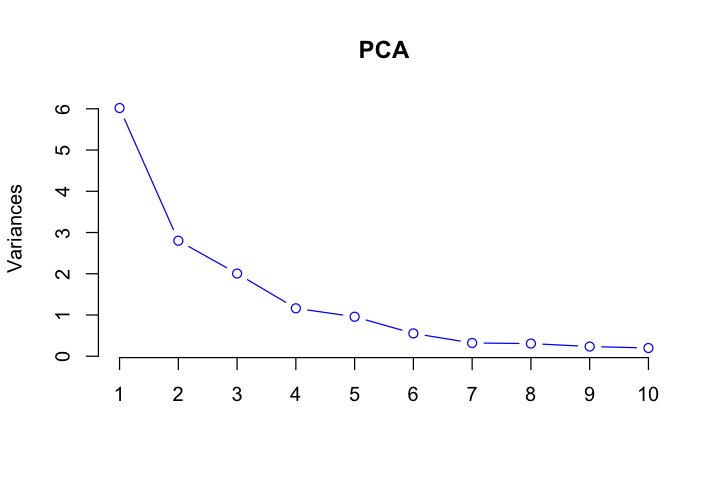

In [31]:
screeplot(PCA, type = "lines", col = "blue")

So based on the output from prcomp which suggested 5 components and the screeplot above which also suggested 5 components, I am going to build a model with just the 5 PCA components. The code block below stores the component coefficients, and then I output the head of the data for a quick glance.

In [49]:
# Get first 5 principle components
PC <- PCA$x[,1:5]
head(PC)

PC1,PC2,PC3,PC4,PC5
-4.199284,-1.0938312,-1.11907395,0.67178115,0.05528338
1.172663,0.6770136,-0.05244634,-0.08350709,-1.17319982
-4.173725,0.2767750,-0.37107658,0.37793995,0.54134525
3.834962,-2.5769060,0.22793998,0.38262331,-1.64474650
1.839300,1.3309856,1.27882805,0.71814305,0.04159032
2.907234,-0.3305421,0.53288181,1.22140635,1.37436096


In this next step I bound the Crime response variable into the PCA dataset I created above. I then created a basic linear regression model with Crime as the response and the rest of the components in the uscrimePC dataset as the predictors. Based on the summary output from the model, every component appears to be a signficiant predictor based on the P-Values except for PC3. While the P value for this component is higher than the standard significance level it is still relatively low so I will include it in the model. The overall P value for the model is below the standard significance level so I am confident in these predictors. Additionally, I want to focus on the rSquared value at this point. The value is about 65%, so using just these 5 components we are able to predict with a relatively high accuracy. Compared to last week, I found an R Squared of about 76%. While that value is higher, it also utilized more predictors, and because we didn't do a principle component analysis this delta in explanatory power could be from over fitting.

In [33]:
# Build a linear regression model with the first 5 principle components
uscrimePC <- cbind(PC, uscrime[,16])

modelPCA <- lm(Crime ~ ., data = as.data.frame(uscrimePC))
summary(modelPCA)


Call:
lm(formula = Crime ~ ., data = as.data.frame(uscrimePC))

Residuals:
    Min      1Q  Median      3Q     Max 
-420.79 -185.01   12.21  146.24  447.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      35.59  25.428  < 2e-16 ***
PC1            65.22      14.67   4.447 6.51e-05 ***
PC2           -70.08      21.49  -3.261  0.00224 ** 
PC3            25.19      25.41   0.992  0.32725    
PC4            69.45      33.37   2.081  0.04374 *  
PC5          -229.04      36.75  -6.232 2.02e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 244 on 41 degrees of freedom
Multiple R-squared:  0.6452,	Adjusted R-squared:  0.6019 
F-statistic: 14.91 on 5 and 41 DF,  p-value: 2.446e-08


After building the PCA model, we then need to unscale the coefficients to see the prediction value outputs. First I got the beta coefficients from the linear regression model I built above and then I transformed them into the alpha coefficients which are in terms of the original scaled variables. Then I unscaled the coefficients to get them in terms of the original unscaled coefficients.

In [89]:
# Set K
k <- 5

# Capture the intercept
beta_intercept <- modelPCA$coefficients[1]

# Pull beta coefficients
beta_coeffs <- modelPCA$coefficients[2:(k+1)]

# Multiply the beta coefficients by my rotated 
# PCA matrix to create a vector of alpha coefficients
alpha_coeffs <- PCA$rotation[,1:k] %*% beta_coeffs

# Calculate mu and sigma to be used in calculating original alpha vlaues
mu <- sapply(uscrime[,1:15],mean)
sigma <- sapply(uscrime[,1:15],sd)

# Divide the alpha vector by sigma and beta intercept 
# from above to get the original alpha coefficient
original_alpha <- alpha_coeffs/sigma

# Subtract the sum of (alpha*mu)/ sigma from the intercept
original_beta <- beta_intercept - sum(alpha_coeffs*mu /sigma)

# Finally general original model Y = aX + b
unscaled <- as.matrix(uscrime[,1:15]) %*% original_alpha + original_beta

# Show head of estimated values
head(unscaled)

714
1196
506
1745
1004
901


After unscaling the coefficients we can then use the unscaled data to evaluate the accuracy of the model. I first calculated the SSE and the sum of squared totals, before calculating the R Squared value. Interestingly the R Squares is still around 65%, but a little bit lower at 0.645.

In [80]:
sse <- sum((unscaled - uscrime[,16])^2)
ss_tot <- sum((uscrime$Crime - mean(uscrime$Crime))^2)
r2 <- 1 - sse/ss_tot
r2

[1] 0.6451941

In [91]:
test_value <- data.frame(M = 14.0, 
                         So = 0, 
                         Ed = 10.0, 
                         Po1 = 12.0, 
                         Po2 = 15.5,  
                         LF = 0.640, 
                         M.F = 94.0, 
                         Pop = 150, 
                         NW = 1.1, 
                         U1 = 0.120, 
                         U2 = 3.6, 
                         Wealth = 3200, 
                         Ineq = 20.1, 
                         Prob = 0.040, 
                         Time = 39.0)

prediction_df <- data.frame(predict(PCA, test_value))
predict(modelPCA, prediction_df)


1 
1389

Finally, I used the trained PCA model to predict the value of 1388 on the test value given. Last week the value I got from my most accurate model was about 1304 with an R Squared of about 77%. This mean seem like a strong model than this week which output a value of 1388 with an RSquared of about 65%, however this model uses significantly fewer predictors to get a relatively similar output.